In [7]:
%pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\administrator\appdata\local\programs\python\python312\lib\site-packages\torchlight-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


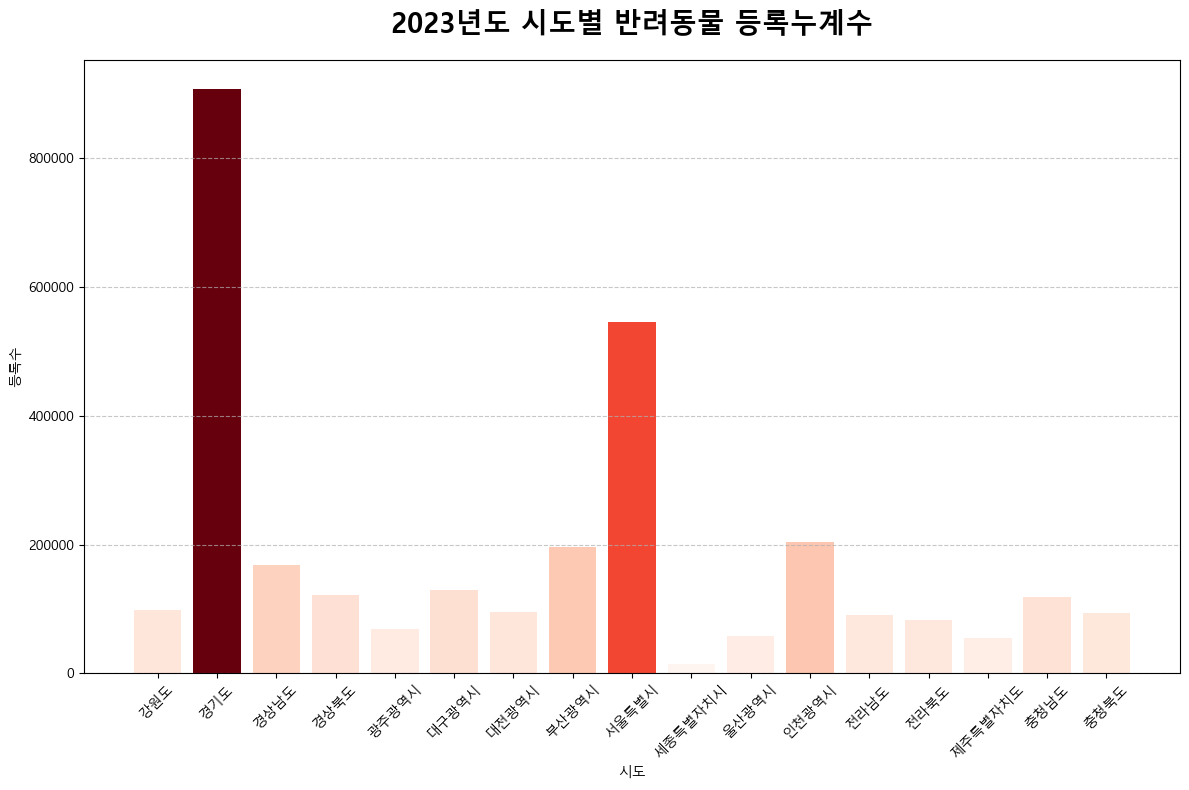

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "농림축산식품부 농림축산검역본부_행정구역별 반려동물등록 개체수현황_231211.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 시도별로 데이터 집계
grouped = df.groupby('시도')['등록누계'].sum().reset_index()

# 색상 설정
norm = Normalize(vmin=grouped['등록누계'].min(), vmax=grouped['등록수'].max())
cmap = plt.cm.Reds
sm = ScalarMappable(cmap=cmap, norm=norm)
colors = sm.to_rgba(grouped['등록누계'])

# 막대 그래프 시각화
plt.figure(figsize=(12, 8))
plt.bar(grouped['시도'], grouped['등록누계'], color=colors)
plt.title('2023년도 시도별 반려동물 등록누계수', pad=20, fontsize=20, fontweight='bold')
plt.xlabel('시도')
plt.ylabel('등록수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 점선 추가
plt.tight_layout()
plt.show()

In [73]:
import folium
import pandas as pd
import json
import numpy as np

# GeoJSON 파일 경로
geojson_file = 'SIDO_MAP_2022.json'

# GeoJSON 파일 읽기
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# CSV 파일 읽기
file_path = "농림축산식품부 농림축산검역본부_행정구역별 반려동물등록 개체수현황_231211.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 시도별로 데이터 집계
grouped = df.groupby('시도')['등록누계'].sum().reset_index()

# Folium 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 데이터의 최소값과 최대값을 기반으로 구간 설정
bins = list(np.linspace(grouped['등록누계'].min(), grouped['등록누계'].max(), 10))

# Choropleth 추가
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=grouped,
    columns=['시도', '등록누계'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=bins
).add_to(m)

# GeoJsonTooltip 추가
folium.GeoJsonTooltip(
    fields=['CTP_KOR_NM'],  # GeoJSON의 시도 이름 속성
    aliases=['시도명: '],  # 툴팁에 표시될 텍스트
    localize=True
).add_to(choropleth.geojson)

# 지도 저장
m.save('korea.html')

In [91]:
import folium
import pandas as pd
import json
import numpy as np

# GeoJSON 파일 경로
geojson_files = ['hangjeongdong_경기도.geojson', 'hangjeongdong_서울특별시.geojson']

# GeoJSON 데이터 읽기
geojson_data = []
for file in geojson_files:
    with open(file, 'r', encoding='utf-8') as f:
        geojson_data.append(json.load(f))

# CSV 파일 읽기
file_path = "농림축산식품부 농림축산검역본부_행정구역별 반려동물등록 개체수현황_231211.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 시군구별로 데이터 집계
grouped = df.groupby('시군구')['등록누계'].sum().reset_index()

# 시군구 이름 정규화 함수
def normalize_name(name):
    return name.strip().replace(" ", "").replace("시", "").replace("구", "").replace("군", "")

# Folium 지도 생성
m = folium.Map(location=[37.5, 127.5], zoom_start=9)  # 서울 및 경기도 중심 좌표

# 색상 매핑 함수
def get_color(count):
    if count > 60000:
        return '#800026'  # Dark Red
    elif count > 50000:
        return '#bd0026'  # Red
    elif count > 40000:
        return '#e31a1c'  # Medium Red
    elif count > 30000:
        return '#fc4e2a'  # Orange Red
    elif count > 20000:
        return '#fd8d3c'  # Orange
    elif count > 10000:
        return '#feb24c'  # Light Orange
    elif count > 5000:
        return '#fed976'  # Yellow
    else:
        return '#ffffb2'  # Light Yellow

# 각 GeoJSON 파일에 대해 GeoJson 추가
for geo_data in geojson_data:
    folium.GeoJson(
        geo_data,
        name='geojson',
        style_function=lambda feature: {
            'fillColor': get_color(
                grouped.loc[grouped['시군구'].apply(normalize_name) == normalize_name(feature['properties']['sggnm']), '등록누계'].values[0]
                if not grouped.loc[grouped['시군구'].apply(normalize_name) == normalize_name(feature['properties']['sggnm']), '등록누계'].empty
                else 0  # 기본값 설정
            ),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7,
        },
        tooltip=folium.GeoJsonTooltip(
            fields=['sggnm'],
            aliases=['지역명: '],
            localize=True
        )
    ).add_to(m)

# 지도 저장
m.save('seoul_gyeonggi_pet_registration_custom_style_map3.html')

In [78]:
import folium
import pandas as pd
import json
import numpy as np

# GeoJSON 파일 경로
geojson_files = ['hangjeongdong_경기도.geojson', 'hangjeongdong_서울특별시.geojson']

# GeoJSON 데이터 읽기
geojson_data = []
for file in geojson_files:
    with open(file, 'r', encoding='utf-8') as f:
        geojson_data.append(json.load(f))

# CSV 파일 읽기
file_path = "농림축산식품부 농림축산검역본부_행정구역별 반려동물등록 개체수현황_231211.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 시군구별로 데이터 집계
grouped = df.groupby('시군구')['등록누계'].sum().reset_index()

# Folium 지도 생성
m = folium.Map(location=[37.5, 127.5], zoom_start=9)  # 서울 및 경기도 중심 좌표

# 데이터의 최소값과 최대값을 기반으로 구간 설정
bins = list(np.linspace(grouped['등록누계'].min(), grouped['등록누계'].max(), 10))

# 각 GeoJSON 파일에 대해 Choropleth 추가
for geo_data in geojson_data:
    choropleth = folium.Choropleth(
        geo_data=geo_data,
        name='choropleth',
        data=grouped,
        columns=['시군구', '등록누계'],
        key_on='feature.properties.sggnm',  # GeoJSON의 시군구 이름 속성
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        bins=bins,
        legend_name='반려동물 등록 개체수'
    ).add_to(m)

    # GeoJsonTooltip 추가
    folium.GeoJsonTooltip(
        fields=['sggnm'],  # GeoJSON의 시군구 이름 속성
        aliases=['지역명: '],  # 툴팁에 표시될 텍스트
        localize=True
    ).add_to(choropleth.geojson)

# 지도 저장
m.save('seoul.html')

In [71]:
import folium
import pandas as pd
import json

# GeoJSON 파일 경로
geojson_file = 'hangjeongdong_서울특별시.geojson'

# GeoJSON 파일 읽기
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# CSV 파일 읽기
file_path = "농림축산식품부 농림축산검역본부_행정구역별 반려동물등록 개체수현황_231211.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 시군구별로 데이터 집계
grouped = df.groupby('시군구')['등록누계'].sum().reset_index()

# Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심 좌표

# Choropleth 추가
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=grouped,
    columns=['시군구', '등록누계'],
    key_on='feature.properties.sggnm',  # GeoJSON의 시군구 이름 속성
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='반려동물 등록 개체수'
).add_to(m)

# GeoJsonTooltip 추가
folium.GeoJsonTooltip(
    fields=['sggnm'],  # GeoJSON의 시군구 이름 속성
    aliases=['지역구명: '],  # 툴팁에 표시될 텍스트
    localize=True
).add_to(choropleth.geojson)

m.get_root().html.add_child(folium.Element(legend_html))

# 지도 저장
m.save('seoul_pet_registration_map_with_custom_legend.html')

In [3]:
import requests
import pandas as pd

# API Key 설정
API_KEY = '5fcb4bcd846a605130cf80ff0399c4d875d18363dbdeaa09a80e73d629c8c70e'  # 발급받은 API 키 입력

# 빈 데이터프레임 생성
df_total = pd.DataFrame()

# 반복적으로 API 요청하여 모든 데이터 가져오기
start_index = 1
end_index = 1000  # 한 번에 최대 1000개의 데이터를 요청
max_data_count = 10000  # 최대 예상 데이터 수 (적절히 변경 가능)

while start_index <= max_data_count:
    # API 요청 URL 생성
    url = f"http://211.237.50.150:7080/openapi/{API_KEY}/json/Grid_20210806000000000612_1/{start_index}/{end_index}"
    
    # API 요청 보내기
    response = requests.get(url)
    data = response.json()

    # totalCnt 가져와서 전체 데이터 개수 설정
    if start_index == 1:
        max_data_count = int(data['Grid_20210806000000000612_1']['totalCnt'])
        print(f"총 데이터 개수: {max_data_count}")
    
    # 데이터 파싱 (필요한 항목만 추출)
    if 'row' in data['Grid_20210806000000000612_1']:
        rows = data['Grid_20210806000000000612_1']['row']
        df = pd.DataFrame(rows)
        df_total = pd.concat([df_total, df], ignore_index=True)  # 데이터 결합
    else:
        print("더 이상 데이터를 찾을 수 없습니다.")
        break

    # 인덱스 업데이트
    start_index = end_index + 1
    end_index += 1000
    if end_index > max_data_count:
        end_index = max_data_count

# CSV 파일로 저장
csv_filename = 'animal_registration_data.csv'
df_total.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"데이터가 {csv_filename}로 저장되었습니다.")


총 데이터 개수: 352207
데이터가 animal_registration_data.csv로 저장되었습니다.


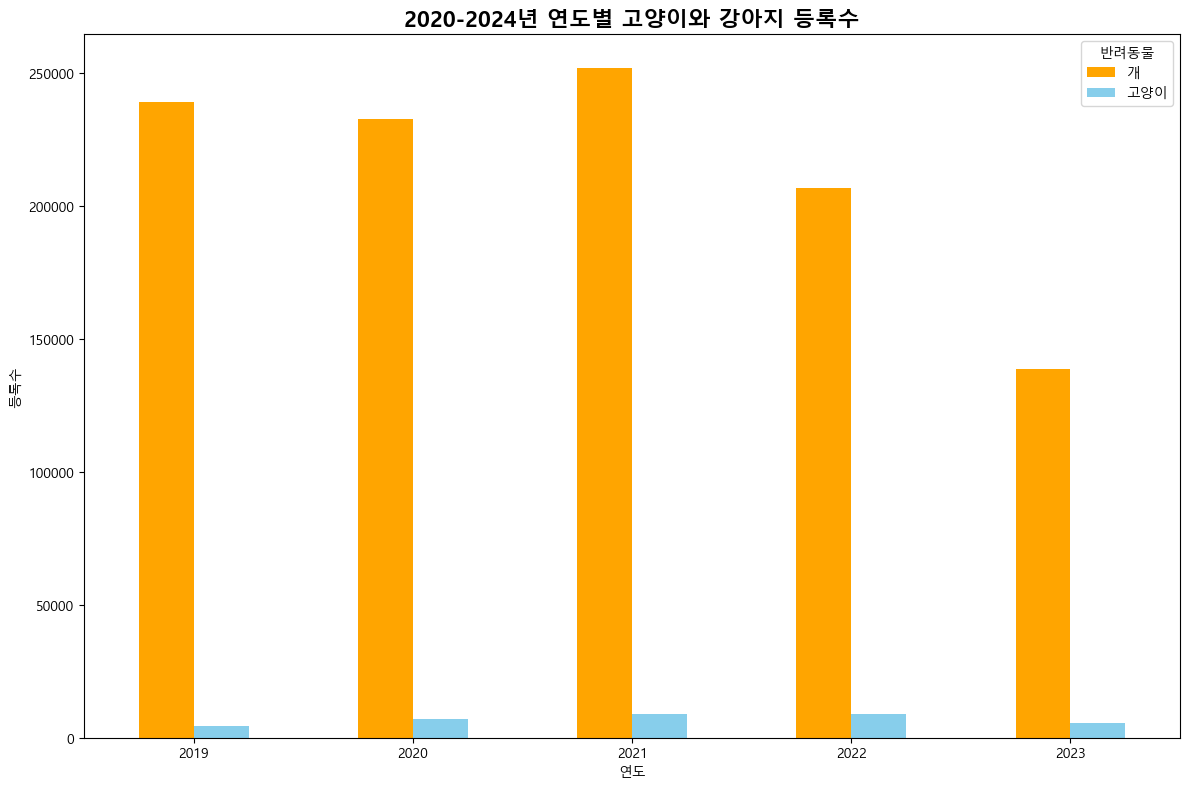

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "E:/ppt/animal_registration_data.csv"
df = pd.read_csv(file_path)

# NaN 값을 0으로 대체하고 연도를 정수형으로 변환
df['BRDT'] = df['BRDT'].fillna(0).astype(int)

# 2020년부터 2024년까지 데이터 필터링
df_filtered = df[(df['BRDT'] >= 2019) & (df['BRDT'] <= 2023)]

# 고양이와 강아지 데이터 필터링
df_filtered = df_filtered[df_filtered['LVSTCK_KND'].isin(['고양이', '개'])]

# 연도별, 축종별 데이터 집계
grouped = df_filtered.groupby(['BRDT', 'LVSTCK_KND'])['CNT'].sum().unstack()

# 세로 막대 그래프 시각화
grouped.plot(kind='bar', figsize=(12, 8), color=['orange', 'skyblue'])

plt.title('2020-2024년 연도별 고양이와 강아지 등록수', fontsize=16, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('등록수')
plt.xticks(rotation=0)
plt.legend(title='반려동물')
plt.tight_layout()
plt.show()

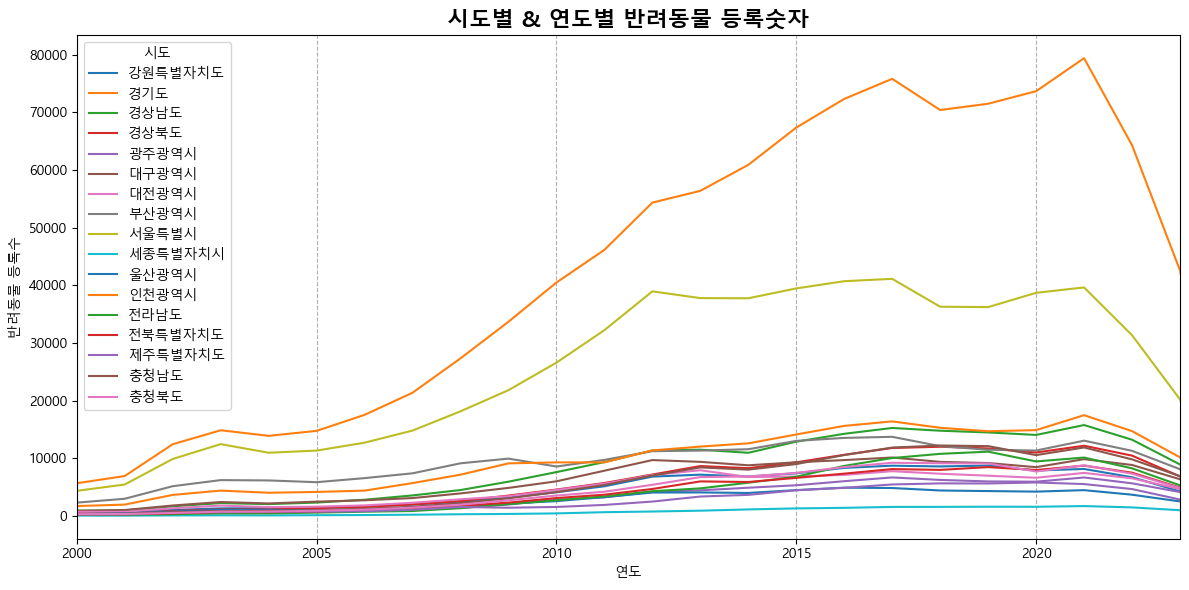

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "E:/ppt/animal_registration_data.csv"
df = pd.read_csv(file_path)

# NaN 값을 0으로 대체하고 연도를 정수형으로 변환
df['BRDT'] = df['BRDT'].fillna(0).astype(int)

# 시도와 연도별로 데이터 집계
grouped = df.groupby(['CTPV', 'BRDT'])['CNT'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
for ctpv in grouped['CTPV'].unique():
    subset = grouped[grouped['CTPV'] == ctpv]
    plt.plot(subset['BRDT'], subset['CNT'], label=ctpv)

plt.title('시도별 & 연도별 반려동물 등록숫자', fontsize=16, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('반려동물 등록수')
plt.xlim(2000, 2023)  # x축 범위 설정
plt.legend(title='시도')
plt.grid(axis='x', linestyle='--')  # x축에 점선 격자 추가
plt.tight_layout()
plt.show()

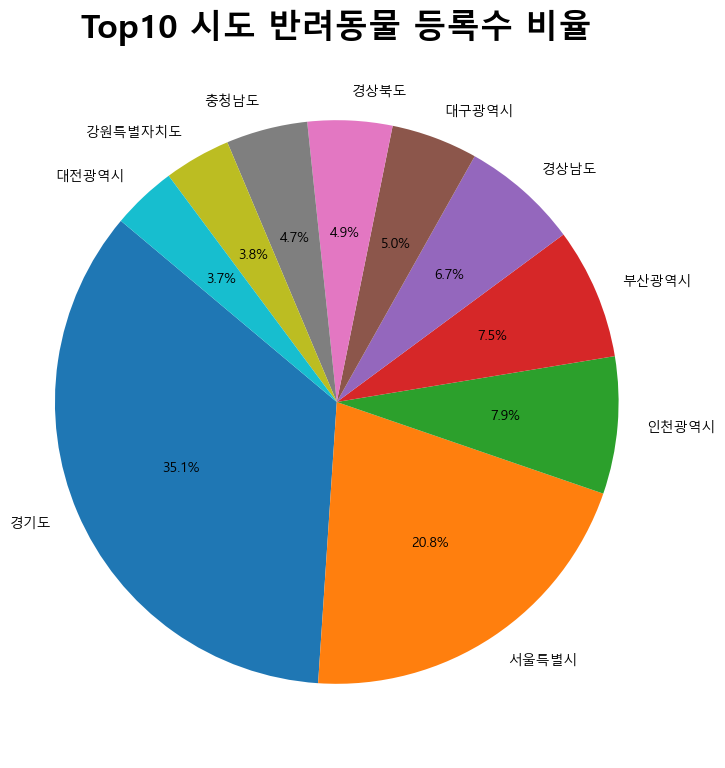

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "E:/ppt/animal_registration_data.csv"
df = pd.read_csv(file_path)

# NaN 값을 0으로 대체하고 연도를 정수형으로 변환
df['BRDT'] = df['BRDT'].fillna(0).astype(int)

# 시도별로 데이터 집계
grouped = df.groupby('CTPV')['CNT'].sum().reset_index()

# 상위 10개 시도 선택
top10 = grouped.nlargest(10, 'CNT')

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(top10['CNT'], labels=top10['CTPV'], autopct='%1.1f%%', startangle=140)
plt.title('Top10 시도 반려동물 등록수 비율', fontsize=24, fontweight='bold')
plt.axis('equal')  # 원형으로 표시

# 타이틀과 그래프 간격 조정
plt.subplots_adjust(top=1)

plt.show()

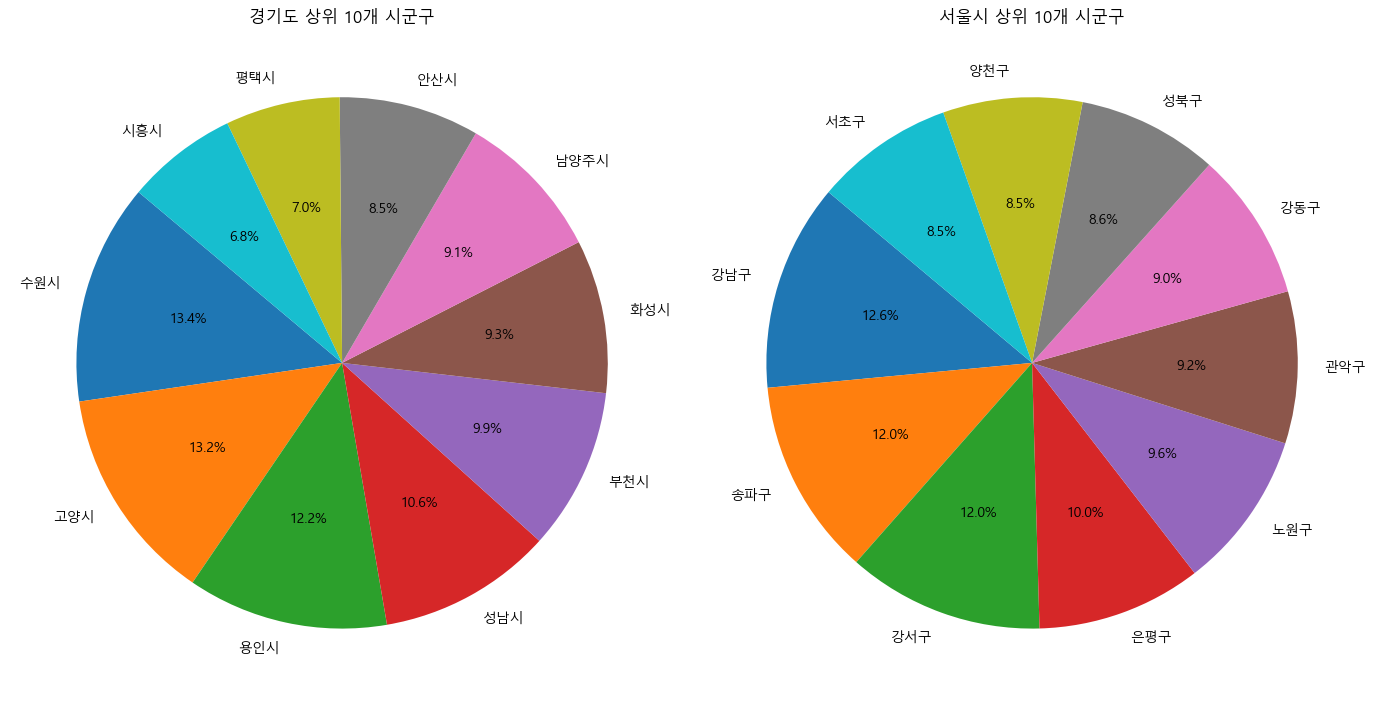

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "E:/ppt/animal_registration_data.csv"
df = pd.read_csv(file_path)

# NaN 값을 0으로 대체하고 연도를 정수형으로 변환
df['BRDT'] = df['BRDT'].fillna(0).astype(int)

# 경기도와 서울시 데이터 필터링
gyeonggi = df[df['CTPV'] == '경기도']
seoul = df[df['CTPV'] == '서울특별시']

# 시군구별로 데이터 집계
gyeonggi_grouped = gyeonggi.groupby('SGG')['CNT'].sum().reset_index()
seoul_grouped = seoul.groupby('SGG')['CNT'].sum().reset_index()

# 상위 10개 시군구 선택
gyeonggi_top10 = gyeonggi_grouped.nlargest(10, 'CNT')
seoul_top10 = seoul_grouped.nlargest(10, 'CNT')

# 파이 차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 경기도 파이 차트
axes[0].pie(gyeonggi_top10['CNT'], labels=gyeonggi_top10['SGG'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('경기도 상위 10개 시군구')

# 서울시 파이 차트
axes[1].pie(seoul_top10['CNT'], labels=seoul_top10['SGG'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('서울시 상위 10개 시군구')

plt.tight_layout()
plt.show()

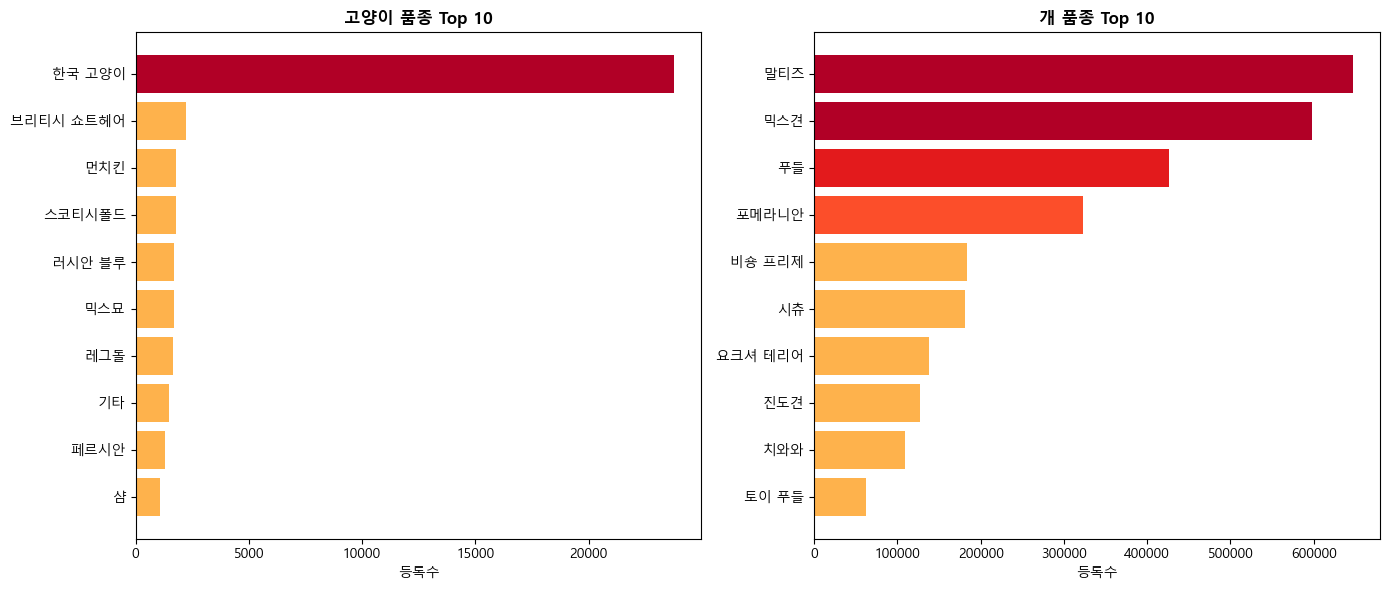

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "E:/1006/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = "E:/ppt/animal_registration_data.csv"
df = pd.read_csv(file_path)

# NaN 값을 0으로 대체하고 연도를 정수형으로 변환
df['BRDT'] = df['BRDT'].fillna(0).astype(int)

# 고양이 품종 상위 10개
cat_top10 = df[df['LVSTCK_KND'] == '고양이'].groupby('SPCS')['CNT'].sum().nlargest(10).reset_index()

# 개 품종 상위 10개
dog_top10 = df[df['LVSTCK_KND'] == '개'].groupby('SPCS')['CNT'].sum().nlargest(10).reset_index()

# 색상 매핑 함수
def get_color(value, max_value):
    if value > max_value * 0.9:
        return '#b10026'  # Dark Red
    elif value > max_value * 0.6:
        return '#e31a1c'  # Red
    elif value > max_value * 0.4:
        return '#fc4e2a'  # Orange Red
    else:
        return '#feb24c'  # Yellow

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 고양이 품종 그래프
cat_colors = [get_color(cnt, cat_top10['CNT'].max()) for cnt in cat_top10['CNT']]
axes[0].barh(cat_top10['SPCS'], cat_top10['CNT'], color=cat_colors)
axes[0].invert_yaxis()  # 높은 값이 위로 오도록 반전
axes[0].set_title('고양이 품종 Top 10', fontweight='bold')
axes[0].set_xlabel('등록수')

# 개 품종 그래프
dog_colors = [get_color(cnt, dog_top10['CNT'].max()) for cnt in dog_top10['CNT']]
axes[1].barh(dog_top10['SPCS'], dog_top10['CNT'], color=dog_colors)
axes[1].invert_yaxis()  # 높은 값이 위로 오도록 반전
axes[1].set_title('개 품종 Top 10', fontweight='bold')
axes[1].set_xlabel('등록수')

plt.tight_layout()
plt.show()